# **Tanzanian Water Wells**

# Business Understanding

### Business Overview  

Tanzania is one of the countries located in East Africa and has a population of over 67 million. The country has a diverse geography that includes Mount Kilimanjaro, the Serengeti, and lakes Victoria and Tanganyika. Its home to over 120 ethnic groups and uses Swahili and English as official languages. Most people live in rural areas, and the population is largely young. Politically, it is a stable presidential republic led by the long-ruling Chama Cha Mapinduzi (CCM) party. The economy depends on agriculture, tourism, and mining. However, Tanzania faces key development challenges, including poverty, youth unemployment, and regional disparities. A critical concern is limited access to clean water, especially in rural areas where water sources are scarce or polluted. This impacts health, agriculture, and education, particularly for women and children who collect water daily.

With this context, the Government of Tanzania in collboration with sector stakeholders through the Ministry of Water and Irrigation is in progress implementing its 20-Year (2006-2025) Water Sector Development Programme (WSDP) alongside the Tanzania Development Vision 2025 which aspires to achieve universal access to water supply in urban areas and ensuring 90% water supply coverage in rural areas by 2025. The Vision also aspires to ensure that water resources are available in a sustainable manner to serve as a driver to social and economic needs. This goal aligns and contributes to the realization of Sustainable Development Goal 6, that aims to ensure the availability and sustainable management of water and sanitation for all by 2030. In Tanzania, the current average water supply coverage in urban and rural areas is 78% and 59.76%, respectively. The major water sources include Lake Victoria, Lake Tanganyika, rivers like the Rufiji, underground aquifers, and wells both shallow and deep. However, access is challenged by seasonal variability, pollution, overuse, and inadequate infrastructure. In rural areas, many depend on wells, which often face issues like contamination, drying, and poor maintenance.

### Problem Statement  

In Tanzania, a larger proportion of its citizenry relies of water wells as key source of water. Such sources are prone to contamination, drying, and poor maintenance. Therefore, it requires monitoring for water levels, quality and even maintenance. The Tanzanian water wells dataset provides a comprehensive information for approximately over 59,000 water wells with necessary features providing information related to pump, installation, location and condition related.  As government in collaboration with sector stakeholders (NGOs, private actors) put measures to achieve universal access to water supply in urban areas and ensuring 90% water supply coverage in rural areas by 2025. It is prudent to identify where to invest scarce resources and achieve optimal impact utilizing the available information. The task at hand involves finding a scientific approach that can provide information on which waterpoints (water wells) will likely fail and thus better plan accordingly for operational maintenance.
Therefore, as a data scientist, we hope to solve this problem by developing a predictive model that can be used to determine which water pumps are faulty to promote access to clean, potable water across Tanzania

#### **Objectives**
The overall objective is to build a predictive model that classifies the operational status of water wells based on attributes provided in the Tanzanian Water Wells dataset. To realize this, the following specific objectives are introduced.  
1. To identify patterns influencing the functionality of the wells
2. Develop models for predicting the functionality of the water wells
3. To evaluate the models and identify the significant features for determining wells functionality 

#### Metrics for Model Evaluation 
To evaluate the performance of the models, the following metrics will be considered  
1. Accuracy - *Measure overall correctedness* 
2. Precision - **
3. Confusion matrix - *Visualize performacne per class by showing true and predicted values*
4. Log loss (cross-enthrophy loss) - *Measures error in predicted probabilities*
5. ROC - AUC - *Evaluates ability to distinguish classes*

# Data Understanding

In [121]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


In [30]:
# Load the datasets
Training_values = pd.read_csv("Data/Training_set_values.csv")
Training_labels = pd.read_csv("Data/Training_set_labels.csv")
Test_values = pd.read_csv("Data/Test_set_values.csv")

print(Training_values.columns)
print("......................................................................................\n")
print(Training_labels.columns)
print("......................................................................................\n")
print(Training_labels["status_group"].value_counts())

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')
......................................................................................

Index(['id', 'status_group'], dtype='object')
......................................................................................

status_group
functional                 32259
non functional             22824
functio

#### Description of the datasets

The Tanzanian Water Wells dataset available for this problem are as follows
1. Training_set_values - The file contains 40 features(predictors) that will be used to train the model. 
2. Training_set_labels - The file contains the target variable that we will be exploring its prediction. It captures the operational status of the waterpoint and has three categories (functional, non-functional, and functional needs repair).
3. Test_set_values - This has similar features (40) as the Training_set_values file. It will be used for generating predictions after training the model

## Data Preparation

#### Data Pre-processing - *Training Data*

In [31]:
# Merging Training values with labels using id column. 
#This is a necessary step before cleaning of the data.
merged = pd.merge(Training_values,Training_labels, on='id')
merged.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [32]:
# Check for duplicate rows on the data
duplicate_rows = merged[merged.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


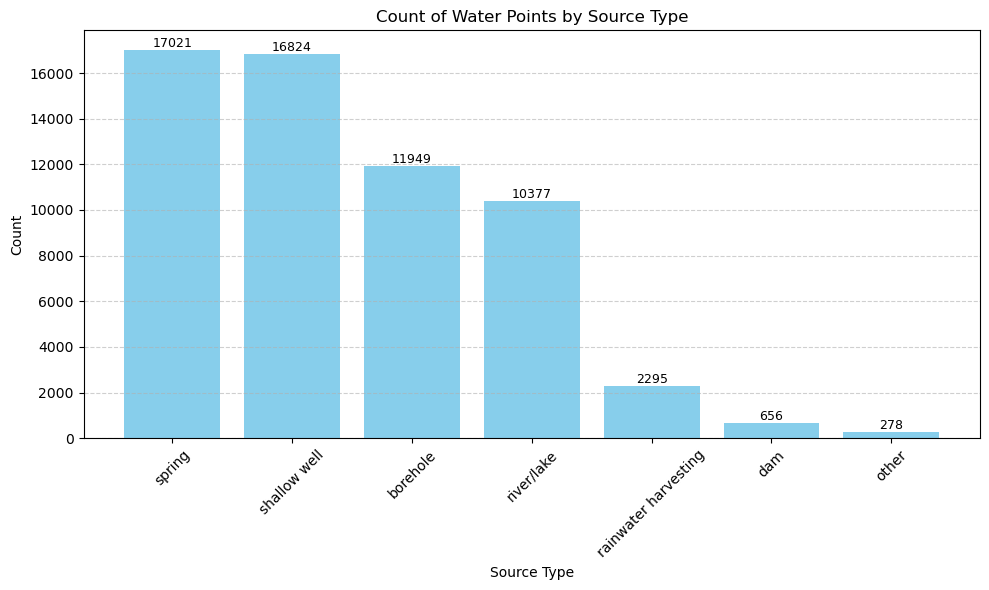

In [33]:
# plot water point by source type
source_counts = merged['source_type'].value_counts()
plt.figure(figsize=(10, 6))
x= source_counts.index
y = source_counts.values
bars = plt.bar(x, y, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.title('Count of Water Points by Source Type')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Data Reduction**
From the bar plot of *water points by soutce type* we observe that in Tanzania, **Springs (17,021)** are the main source of water followed by **shallow weells (16,829)** and **boreholes (11,949)**, river/lakes, rainwater harvesting, dam and others in that order.
Wells are Man-made hole dug or drilled into the ground and require pumping or drawing manually to draw the water. Considering our research, we will focus on water sources that can be classified as water wells (Shallow wells and boreholes). With an assumption we will drop the rest of water sources in our dataset. 

In [35]:
#Drop all data related to other water source type except wells
water_wells_data = merged[merged['source_type'].isin(['shallow well', 'borehole'])].copy()

len(water_wells_data)

28773

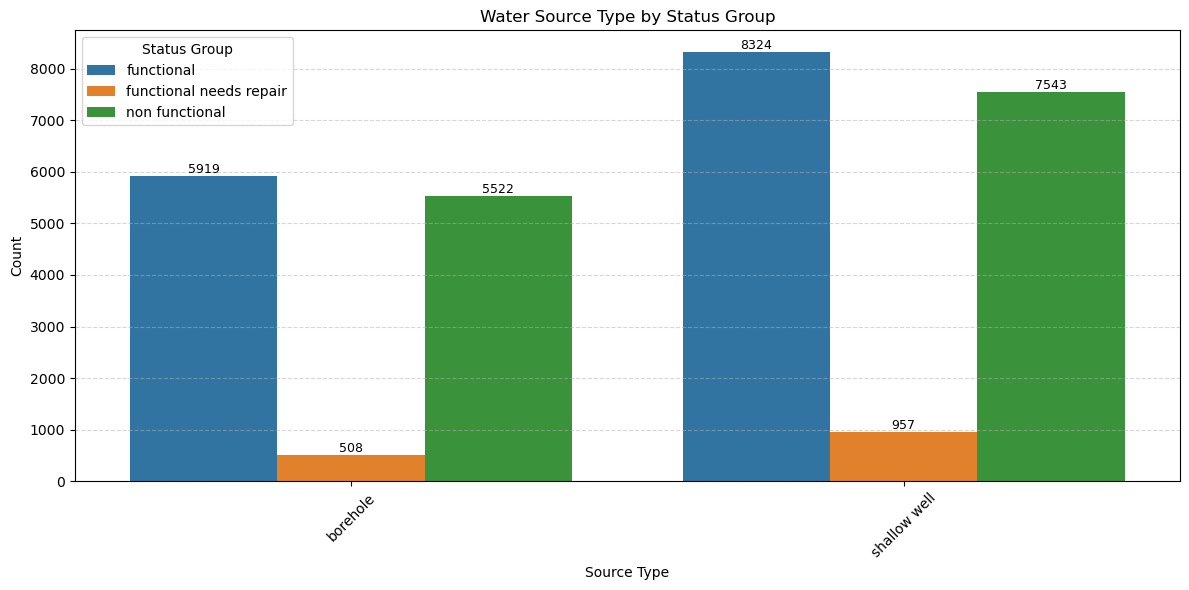

In [36]:
# Explore water wells data by Status

# Group the data by source_type and status_group
source_status_counts = water_wells_data.groupby(['source_type', 'status_group']).size().reset_index(name='count')

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=source_status_counts,
    x='source_type',
    y='count',
    hue='status_group'
)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Water Source Type by Status Group')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Explanation**
From the bar plot above, water wells data indicates three functionality status. The functional and non-functional water wells are nearly equal, however functional wells requiring reairs are significantly lowe (under a thousand) for both cathegories.

In [37]:
import folium # Use to plot the water points on a map with classfication of their status
from folium import Map
from folium.plugins import HeatMap

# Filter out rows with missing coordinates
heat_data = water_wells_data[['latitude', 'longitude']].dropna()

# Create a folium map centered at the average coordinates
heatmap_center = [heat_data['latitude'].mean(), heat_data['longitude'].mean()]
heat_map = Map(location=heatmap_center, zoom_start=6)

# Add heatmap layer
HeatMap(data=heat_data.values, radius=8, blur=10).add_to(heat_map)

# Display the heat map 
heat_map

**Explanation**  
The heatmap above shows the distribution of water wells across the country, with much denser points indicating more wells than the less denser points. Some points plotted in the pacific ocean (proximity to Accra and Sao Tome) indicate outlier data that related to wrong entry data.

In [38]:
#Exploring feautures information

# Identifying the features to be checked
features = water_wells_data[['amount_tsh','gps_height','population','permit','construction_year','extraction_type_class','management_group','payment_type','quality_group',
   'quantity_group','source_type','waterpoint_type_group']]

features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28773 entries, 3 to 59399
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             28773 non-null  float64
 1   gps_height             28773 non-null  int64  
 2   population             28773 non-null  int64  
 3   permit                 27415 non-null  object 
 4   construction_year      28773 non-null  int64  
 5   extraction_type_class  28773 non-null  object 
 6   management_group       28773 non-null  object 
 7   payment_type           28773 non-null  object 
 8   quality_group          28773 non-null  object 
 9   quantity_group         28773 non-null  object 
 10  source_type            28773 non-null  object 
 11  waterpoint_type_group  28773 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 2.9+ MB


**Explanation**
All the features have no missing values except **permit** with approximately 5% missing values. To proceed, we drop the permit from the list of features and progress to perform data cleaning.

In [39]:
features.columns #['amount_tsh','gps_height','population','construction_year'].describe()

Index(['amount_tsh', 'gps_height', 'population', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_type',
       'waterpoint_type_group'],
      dtype='object')

In [40]:
numeric_features = features[['amount_tsh','gps_height','population','construction_year']]
numeric_features.describe()

,amount_tsh,gps_height,population,construction_year
count,28773.000000,28773.000000,28773.000000,28773.000000
mean,183.346452,435.966184,204.398603,1116.456018
std,2440.175152,597.922355,556.071701,991.914882
min,0.000000,-90.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,1.000000,1980.000000
75%,0.000000,906.000000,250.000000,2002.000000
max,350000.000000,2195.000000,30500.000000,2013.000000


In [41]:
numeric_features.shape

(28773, 4)

In [42]:
# Count zero values in each column
zero_counts = (numeric_features == 0).sum()

print("Zero values in each feature:")
print(zero_counts)

Zero values in each feature:
amount_tsh           21867
gps_height           12548
population           12516
construction_year    12692
dtype: int64


In [43]:
# Set negative gps_height to NaN
water_wells_data.loc[water_wells_data['gps_height'] < 0, 'gps_height'] = np.nan

#### *Imputation of missing values for numerical features*

In [44]:
# Replace zero with NaN for features where zero is likely invalid/missing
cols_to_replace = ['amount_tsh', 'gps_height', 'population', 'construction_year']

for col in cols_to_replace:
    water_wells_data[col] = water_wells_df[col].replace(0, np.nan)

In [45]:
numeric_features = water_wells_data[['amount_tsh','gps_height','population','construction_year']]
numeric_features.skew()

amount_tsh           109.615035
gps_height             0.212169
population            14.153767
construction_year     -1.333649
dtype: float64

In [46]:
#Pick variables deemed useful for analysis and assign to dataframe water_wells_df
water_wells_data =water_wells_data[['amount_tsh', 'gps_height', 'population', 'construction_year','extraction_type_class', 'management_group', 'payment_type','quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group','status_group']]

**Imputing missing values using the median is a common and practical strategy, especially for numeric features.**   
*Strengths*   
1.  Median is not affected by extreme values (unlike mean).This is helpful for skewed distributions like amount_tsh or population
2.  Prevents data loss by avoiding dropping rows with missing values.  

*Challenges*
1. Loss of Variance - Replacing many values with a the median flattens the distribution and may mask important patterns
2. Not Ideal for Linear Models such as logistic regression since many identical imputed values might reduce model sensitivity or introduce bias.

In [47]:
# Impute only in the four numeric features of interest
cols_to_impute = ['amount_tsh', 'gps_height', 'population', 'construction_year']

# Replace NaN values in selected columns with their median
for col in cols_to_impute:
    median_val = water_wells_df[col].median()
    water_wells_data[col] = water_wells_df[col].fillna(median_val)

In [63]:
# Save the cleaned data set
#water_wells_data.to_csv('Data/water_wells_data.csv', index=False) # Commented to avoid re-running

In [60]:
# Save the cleaned data set
water_wells_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28773 entries, 3 to 59399
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             28773 non-null  float64
 1   gps_height             28773 non-null  float64
 2   population             28773 non-null  float64
 3   construction_year      28773 non-null  float64
 4   extraction_type_class  28773 non-null  object 
 5   management_group       28773 non-null  object 
 6   payment_type           28773 non-null  object 
 7   quality_group          28773 non-null  object 
 8   quantity_group         28773 non-null  object 
 9   source_type            28773 non-null  object 
 10  waterpoint_type_group  28773 non-null  object 
 11  status_group           28773 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.9+ MB


## Exploratory Data Analysis

## Modelling

**Model 1 - Logistic Regression**  
A case of Multi class 

In [89]:
#Load the clean dataset
water_wells_logreg = pd.read_csv('Data/water_wells_data.csv')

In [90]:
water_wells_logreg.shape

(28773, 12)

In [91]:
# Multinomial Logistic Regression modelling

# Define target and features
X = water_wells_df.drop('status_group', axis=1)
y = water_wells_df['status_group']

In [92]:
# Identify categorical and numeric features
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [93]:
# Logistic Regression with multinomial setting
model = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(solver='saga', max_iter=2000, multi_class='multinomial'))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['extraction_type_class',
                                                   'management_group',
                                                   'payment_type',
                                                   'quality_group',
                                                   'quantity_group',
                                                   'source_type',
                                                   'waterpoint_type_group']),
                                                 ('num', StandardScaler(),
                                                  ['amount_tsh', 'gps_height',
                                                   'population',
                                                   'construction_year'])])),
                ('clf',
                 LogisticRegression(max_iter=2000, multi_class='multinomial',
                                    solver='saga'))])

In [95]:
# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

             functional       0.69      0.92      0.79      2849
functional needs repair       0.00      0.00      0.00       293
         non functional       0.86      0.64      0.73      2613

               accuracy                           0.74      5755
              macro avg       0.51      0.52      0.51      5755
           weighted avg       0.73      0.74      0.72      5755



**Model 2 - Logistic Model**  
A case of Binary Logistic Regresion

In [78]:
water_wells_logreg2 = pd.read_csv('Data/water_wells_data.csv')

In [79]:
# Replace 'functional needs repair' with 'non functional'

water_wells_logreg2['status_group'] = water_wells_logreg2['status_group'].replace('functional needs repair', 'non functional')

In [80]:
print(water_wells_logreg2['status_group'].value_counts())

status_group
non functional    14530
functional        14243
Name: count, dtype: int64


In [81]:
water_wells_logreg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28773 entries, 0 to 28772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             28773 non-null  float64
 1   gps_height             28773 non-null  float64
 2   population             28773 non-null  float64
 3   construction_year      28773 non-null  float64
 4   extraction_type_class  28773 non-null  object 
 5   management_group       28773 non-null  object 
 6   payment_type           28773 non-null  object 
 7   quality_group          28773 non-null  object 
 8   quantity_group         28773 non-null  object 
 9   source_type            28773 non-null  object 
 10  waterpoint_type_group  28773 non-null  object 
 11  status_group           28773 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.6+ MB


In [83]:
# Define the target features
X = water_wells_logreg2.drop(columns=['status_group'])
y = (water_wells_logreg2['status_group'] == 'functional').astype(int)   # 1 = functional, 0 = non‑functional

In [84]:
# Group the columns
cat_cols  = X.select_dtypes(include='object').columns.tolist()           
num_cols  = X.select_dtypes(include=['float64','int64']).columns.tolist()

In [86]:
# Preprocessing and modelling

preprocess = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(),                        num_cols)
    ])
logreg = LogisticRegression(max_iter=2000, solver='lbfgs', class_weight='balanced')

from sklearn.pipeline import Pipeline
pipe = Pipeline([
        ('prep', preprocess),
        ('clf' , logreg)
    ])

In [87]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['extraction_type_class',
                                                   'management_group',
                                                   'payment_type',
                                                   'quality_group',
                                                   'quantity_group',
                                                   'source_type',
                                                   'waterpoint_type_group']),
                                                 ('num', StandardScaler(),
                                                  ['amount_tsh', 'gps_height',
                                                   'population',
                                                   'construction_year'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [88]:
# Model Evaluation
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

y_prob = pipe.predict_proba(X_test)[:,1]
print("ROC‑AUC:", roc_auc_score(y_test, y_prob).round(3))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70      2906
           1       0.68      0.90      0.78      2849

    accuracy                           0.74      5755
   macro avg       0.77      0.74      0.74      5755
weighted avg       0.77      0.74      0.74      5755

ROC‑AUC: 0.802


**Alternative Models - Decision Tree**

**Model 3- Decision tree**  
(Binary response variable)

In [96]:
water_wells_tree = pd.read_csv('Data/water_wells_data.csv')

In [99]:
water_wells_tree['status_group'].value_counts()

status_group
functional                 14243
non functional             13065
functional needs repair     1465
Name: count, dtype: int64

In [100]:
# Replace 'functional needs repair' with 'non functional'
water_wells_tree['status_group'] = water_wells_tree['status_group'].replace('functional needs repair', 'non functional')

In [102]:
# Define the target variables
X = water_wells_tree.drop(columns="status_group")
y = (water_wells_tree["status_group"] == "functional").astype(int)   # 1 = functional, 0 = non‑functional

In [103]:
# Pre-processing: One‑hot encode all object (categorical) columnsn while leave numeric columns unchanged (trees don’t need scaling)
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocess = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough",                             num_cols)
    ])

In [108]:
# Modelling - Decision tree
tree_clf = DecisionTreeClassifier(
        criterion     = "gini",
        max_depth     = None,        
        min_samples_split = 2,
        class_weight  = "balanced", 
        random_state  = 42
    )

pipe = Pipeline([
        ("prep", preprocess),
        ("clf" , tree_clf)
    ])

In [109]:
# Train and test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipe.fit(X_tr, y_tr)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_type',
       'waterpoint_type_group'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['amount_tsh', 'gps_height', 'population', 'construction_year'], dtype='object'))])),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [110]:
# Model Evaluation
y_pred  = pipe.predict(X_te)
y_prob  = pipe.predict_proba(X_te)[:,1]

print(classification_report(y_te, y_pred))
print("ROC‑AUC:", roc_auc_score(y_te, y_prob).round(3))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      2906
           1       0.72      0.83      0.77      2849

    accuracy                           0.76      5755
   macro avg       0.76      0.76      0.76      5755
weighted avg       0.76      0.76      0.76      5755

ROC‑AUC: 0.765


In [112]:
### Example (option B)
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('prep', preprocess),
    ('clf', tree_clf)               # keep the original name
])

param_grid = {
    'clf__max_depth'       : [None, 10, 20, 40],
    'clf__min_samples_leaf': [1, 5, 10, 20]
}

grid = GridSearchCV(pipe, param_grid,
                    cv=5, scoring='f1_weighted', n_jobs=-1)

grid.fit(X_tr, y_tr)
print(grid.best_params_)
print(classification_report(y_te, grid.predict(X_te)))


{'clf__max_depth': 20, 'clf__min_samples_leaf': 10}
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      2906
           1       0.72      0.86      0.78      2849

    accuracy                           0.76      5755
   macro avg       0.77      0.77      0.76      5755
weighted avg       0.77      0.76      0.76      5755



**Model 4 - Decision tree**  
Multi class

In [113]:
water_wells_tree2 = pd.read_csv('Data/water_wells_data.csv')

In [ ]:
#Define the Target variables
X = water_wells_tree2.drop(columns="status_group")
y = water_wells_tree2["status_group"] # All the three categories kept

In [115]:
#Pre-processing : One hot encoding for categorical and pass through for numerics
cat_cols = X.select_dtypes(include="object").columns     
num_cols = X.select_dtypes(exclude="object").columns       

preprocess = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough",                             num_cols)
    ])

In [116]:
# Decision Tree modeling 
tree_clf = DecisionTreeClassifier(
        criterion          = "gini",
        max_depth          = None,          # tune later if desired
        min_samples_leaf   = 10,            # small value curbs over‑fitting
        class_weight       = "balanced",    # tackle class imbalance
        random_state       = 42
    )

# Put everything in a single pipeline
pipe = Pipeline([
        ("prep", preprocess),
        ("tree", tree_clf)
    ])

In [117]:
# Train and test Split the data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

pipe.fit(X_tr, y_tr)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_type',
       'waterpoint_type_group'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['amount_tsh', 'gps_height', 'population', 'construction_year'], dtype='object'))])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        min_samples_leaf=10,
                                        random_state=42))])

In [118]:
# Model evaluation
y_pred = pipe.predict(X_te)
print(classification_report(y_te, y_pred))

                         precision    recall  f1-score   support

             functional       0.74      0.52      0.61      2849
functional needs repair       0.12      0.63      0.19       293
         non functional       0.82      0.67      0.74      2613

               accuracy                           0.59      5755
              macro avg       0.56      0.61      0.51      5755
           weighted avg       0.74      0.59      0.65      5755



**Model 5 - RandomForest**  
Multi-class

In [119]:
water_wells_RF = pd.read_csv('Data/water_wells_data.csv')

In [122]:
# Define target variables
X = water_wells_RF.drop(columns="status_group")
y = water_wells_RF["status_group"] 

In [123]:
#Pre-processing : One hot encoding for categorical and pass through for numerics
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols), 
    ("num", "passthrough", num_cols)
])

In [124]:
#Random Forest Modeling
rf_clf = RandomForestClassifier(
        n_estimators      = 300,
        max_depth         = None,
        min_samples_leaf  = 2,
        class_weight      = "balanced",
        n_jobs            = -1,
        random_state      = 42
    )

# Full pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([
        ("prep", preprocess),
        ("rf"  , rf_clf)
    ])

In [126]:
# Train and test split the data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

pipe.fit(X_tr, y_tr)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_type',
       'waterpoint_type_group'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['amount_tsh', 'gps_height', 'population', 'construction_year'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

In [127]:
#Model Evaluation
y_pred = pipe.predict(X_te)
print(classification_report(y_te, y_pred))

                         precision    recall  f1-score   support

             functional       0.75      0.65      0.70      2849
functional needs repair       0.14      0.53      0.22       293
         non functional       0.86      0.71      0.78      2613

               accuracy                           0.67      5755
              macro avg       0.58      0.63      0.56      5755
           weighted avg       0.77      0.67      0.71      5755



In [128]:
# Feature importance
ohe = pipe.named_steps["prep"].named_transformers_["cat"]
ohe_cols = ohe.get_feature_names_out(cat_cols)
all_cols = list(ohe_cols) + list(num_cols)

importances = pipe.named_steps["rf"].feature_importances_
fi = pd.Series(importances, index=all_cols).sort_values(ascending=False)
print("\nTop 15 feature importances:\n", fi.head(15))


Top 15 feature importances:
 gps_height                         0.154051
construction_year                  0.120409
population                         0.103987
quantity_group_dry                 0.096797
extraction_type_class_other        0.060810
waterpoint_type_group_other        0.048773
amount_tsh                         0.044225
extraction_type_class_handpump     0.027109
quantity_group_insufficient        0.026921
quantity_group_enough              0.026798
payment_type_per bucket            0.023980
waterpoint_type_group_hand pump    0.023676
payment_type_never pay             0.022226
payment_type_unknown               0.017770
quality_group_good                 0.016743
dtype: float64


## Model Evaluation - Comparisons

## Conlusions

## Recommendations